## SVM Model

### Library and Data Importation

In [1]:
#import sys
#!{sys.executable} -m pip install cvxpy
import cvxpy as cp
import pandas as pd
import numpy as np
from numpy import array
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

#import data set
nfl1 = pd.read_csv("NFL_data_super_cleaned.csv")

# Drop any remaining rows with NA values
nfl1.dropna(inplace=True)
display(nfl1)
print(nfl1.isnull().values.any(), nfl1.isnull().sum().sum())

,posteam,yardline_100,quarter_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_margin
0,PIT,58.0,893.0,1,1.0,0.0,10,pass,0.0
1,PIT,53.0,856.0,1,2.0,0.0,5,run,0.0
2,PIT,56.0,815.0,1,3.0,0.0,8,pass,0.0
3,PIT,56.0,807.0,1,4.0,0.0,8,kick,0.0
4,TEN,98.0,796.0,1,1.0,0.0,10,run,0.0
...,...,...,...,...,...,...,...,...,...
353055,CAR,71.0,82.0,4,2.0,0.0,1,pass,-5.0
353056,CAR,71.0,77.0,4,3.0,0.0,1,pass,-5.0
353057,CAR,66.0,63.0,4,2.0,0.0,10,pass,-5.0
353058,CAR,66.0,58.0,4,3.0,0.0,10,pass,-5.0


False 0


### Additional Data Preprocessing

In [2]:
#Our 350,000 samples seem like a little too much, so sample about 10,000 rows
sample = nfl1.sample(n=50000, random_state=21, axis=0)

#y needs to be one-dimensional for SVM, so don't encode play_type
labels = np.array(sample["play_type"])
sample = sample.drop("play_type", axis=1)
#one-hot encode categorical feature variables
sample = pd.get_dummies(sample)
#feature_list = list(sample.columns)
features = np.array(sample)
display(sample)
print(sample.isnull().values.any(), sample.isnull().sum().sum())

#split data into training and testing sets
#seed: 21, train/test ratio: 0.2 test, 0.8 train
X_train, X_test, y_train, y_test = train_test_split(sample.to_numpy(), labels, test_size = 0.2, random_state = 21)


,yardline_100,quarter_seconds_remaining,qtr,down,goal_to_go,ydstogo,score_margin,posteam_ARI,posteam_ATL,posteam_BAL,...,posteam_NO,posteam_NYG,posteam_NYJ,posteam_PHI,posteam_PIT,posteam_SEA,posteam_SF,posteam_TB,posteam_TEN,posteam_WAS
222356,61.0,119.0,1,3.0,0.0,22,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
61840,78.0,702.0,1,4.0,0.0,4,-7.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2684,61.0,585.0,4,2.0,0.0,4,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
225580,73.0,483.0,3,3.0,0.0,3,-3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46520,70.0,201.0,1,1.0,0.0,10,7.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288545,69.0,356.0,1,2.0,0.0,14,-3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8533,58.0,239.0,2,2.0,0.0,9,-13.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180041,1.0,819.0,2,2.0,1.0,1,-14.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
290264,74.0,248.0,3,3.0,0.0,1,-18.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


False 0


### Multi-class SVM Model Implementation

              precision    recall  f1-score   support

        kick       0.88      0.97      0.93       981
        pass       0.69      0.73      0.71      5280
         run       0.59      0.53      0.56      3739

    accuracy                           0.68     10000
   macro avg       0.72      0.75      0.73     10000
weighted avg       0.67      0.68      0.68     10000

Confusion matrix, without normalization
[[ 972    6    3]
 [3308  164 1808]
 [1696   62 1981]]
Normalized confusion matrix
[[0.99 0.01 0.  ]
 [0.63 0.03 0.34]
 [0.45 0.02 0.53]]


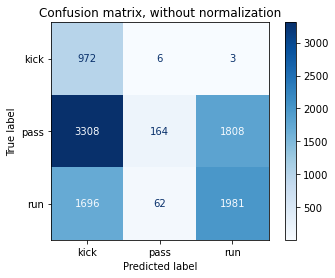

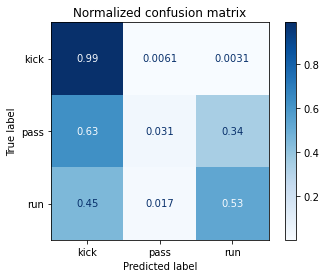

CPU times: total: 1min 59s
Wall time: 1min 59s


In [3]:
%%time
#compares each play_type to the other possible play_type

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

clf_ovo = SVC(kernel='linear', decision_function_shape='ovo') # The other is ovr

clf_ovo.fit(scaler.transform(X_train), np.asarray(y_train))

print(classification_report(y_test, clf_ovo.predict(scaler.transform(X_test))))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix and normalized confusion matrix

# Confusion matrix code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf_ovo,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.savefig("svm-con-matrix.png")
plt.show()